# **DL LAB Practice Programming Assignment-1**

# Problem-1: ANN to solve a Classification problem - on structured tabular data

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt # Plotting library
from sklearn import datasets # Accessing the pre existing iris dataset
from sklearn.model_selection import train_test_split # Splitting the data into training. testing sets
from sklearn.preprocessing import StandardScaler # For Standardisation
from sklearn.linear_model import Perceptron, SGDRegressor # For binary classification and regression model to build a basic perceptron classifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score # classification report metrics report

In [ ]:

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features: Sepal length, Sepal width, Petal length, Petal width
y = iris.target  # Target: Class labels


In [ ]:
# Problem-1: Classification using Perceptron (Setosa vs. Versicolor)
# Selecting only two classes
# Select only Setosa and Versicolor (classes 0 and 1)
X_class = X[y != 2]
y_class = y[y != 2]



In [ ]:

# Standardization
scaler = StandardScaler()
X_class = scaler.fit_transform(X_class)



In [ ]:
# Train-Test Split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)


In [ ]:
# Train Perceptron Model
perceptron = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
perceptron.fit(X_train, y_train)


Perceptron(eta0=0.01, random_state=42)

In [ ]:

# Predictions
y_pred = perceptron.predict(X_test)


In [ ]:

# Classification Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Trained Model Parameters:", perceptron.coef_)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[17  0]
 [ 0 13]]
Trained Model Parameters: [[ 0.01455014 -0.0041777   0.01899073  0.02158912]]


<ipython-input-28-d58209c9d411>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


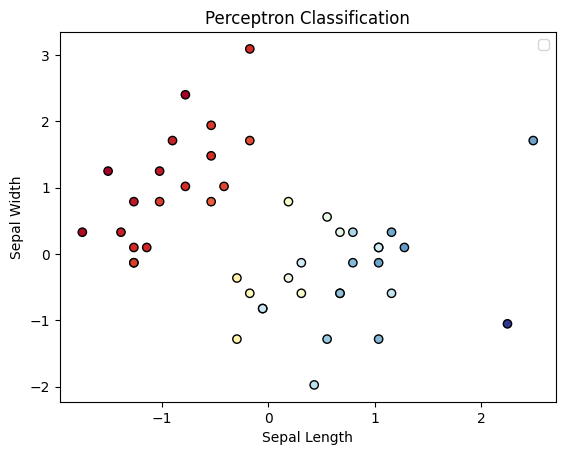

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_pred.squeeze(), cmap= plt.cm.RdYlBu, edgecolors='k')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Perceptron Classification")
plt.legend()
plt.show()


# **Problem-2: ANN to solve a Regression problem - on structured tabular data**

In [ ]:
# Problem-2: Regression using Perceptron (Predicting Petal Length)
X_reg = X[:, [0, 1, 3]]  # Features: Sepal length, Sepal width, Petal width
y_reg = X[:, 2]  # Target: Petal Length


In [ ]:
# Standardization
X_reg = scaler.fit_transform(X_reg)

In [ ]:
# Train-Test Split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [ ]:
# Train Perceptron-based Regression Model
regressor = SGDRegressor(max_iter=1000, eta0=0.01, random_state=42, loss='squared_error')
regressor.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = regressor.predict(X_test)

In [ ]:
# Regression Metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Trained Model Parameters:", regressor.coef_)

Mean Squared Error (MSE): 0.10754129651549399
R² Score: 0.9681073764848036
Trained Model Parameters: [ 0.68779111 -0.32567883  1.02233063]


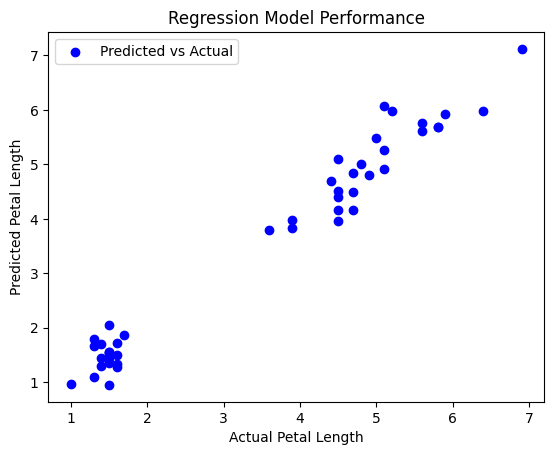

In [ ]:
# Plot Actual vs. Predicted Values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Regression Model Performance")
plt.legend()
plt.show()